In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('Coimbra_breast_cancer_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Quantitative Attributes:

Age (years): Age of the individuals.
BMI (kg/m²): Body Mass Index, a measure of body fat based on weight and height.
Glucose (mg/dL): Blood glucose levels, an important metabolic indicator.
Insulin (µU/mL): Insulin levels, a hormone related to glucose regulation.
HOMA: Homeostatic Model Assessment, a method for assessing insulin resistance and beta-cell function.
Leptin (ng/mL): Leptin levels, a hormone involved in regulating appetite and energy balance.
Adiponectin (µg/mL): Adiponectin levels, a protein associated with metabolic regulation.
Resistin (ng/mL): Resistin levels, a protein implicated in insulin resistance.
MCP-1 (pg/dL): Monocyte Chemoattractant Protein-1, a cytokine involved in inflammation.
Labels:

1: Healthy controls
2: Patients with breast cancer

In [3]:
# here we change the classification encoding, since it´s common to use 1 for positive class and 0 for negative class
df['Classification'] = df['Classification'] -1

<Figure size 1000x1000 with 0 Axes>

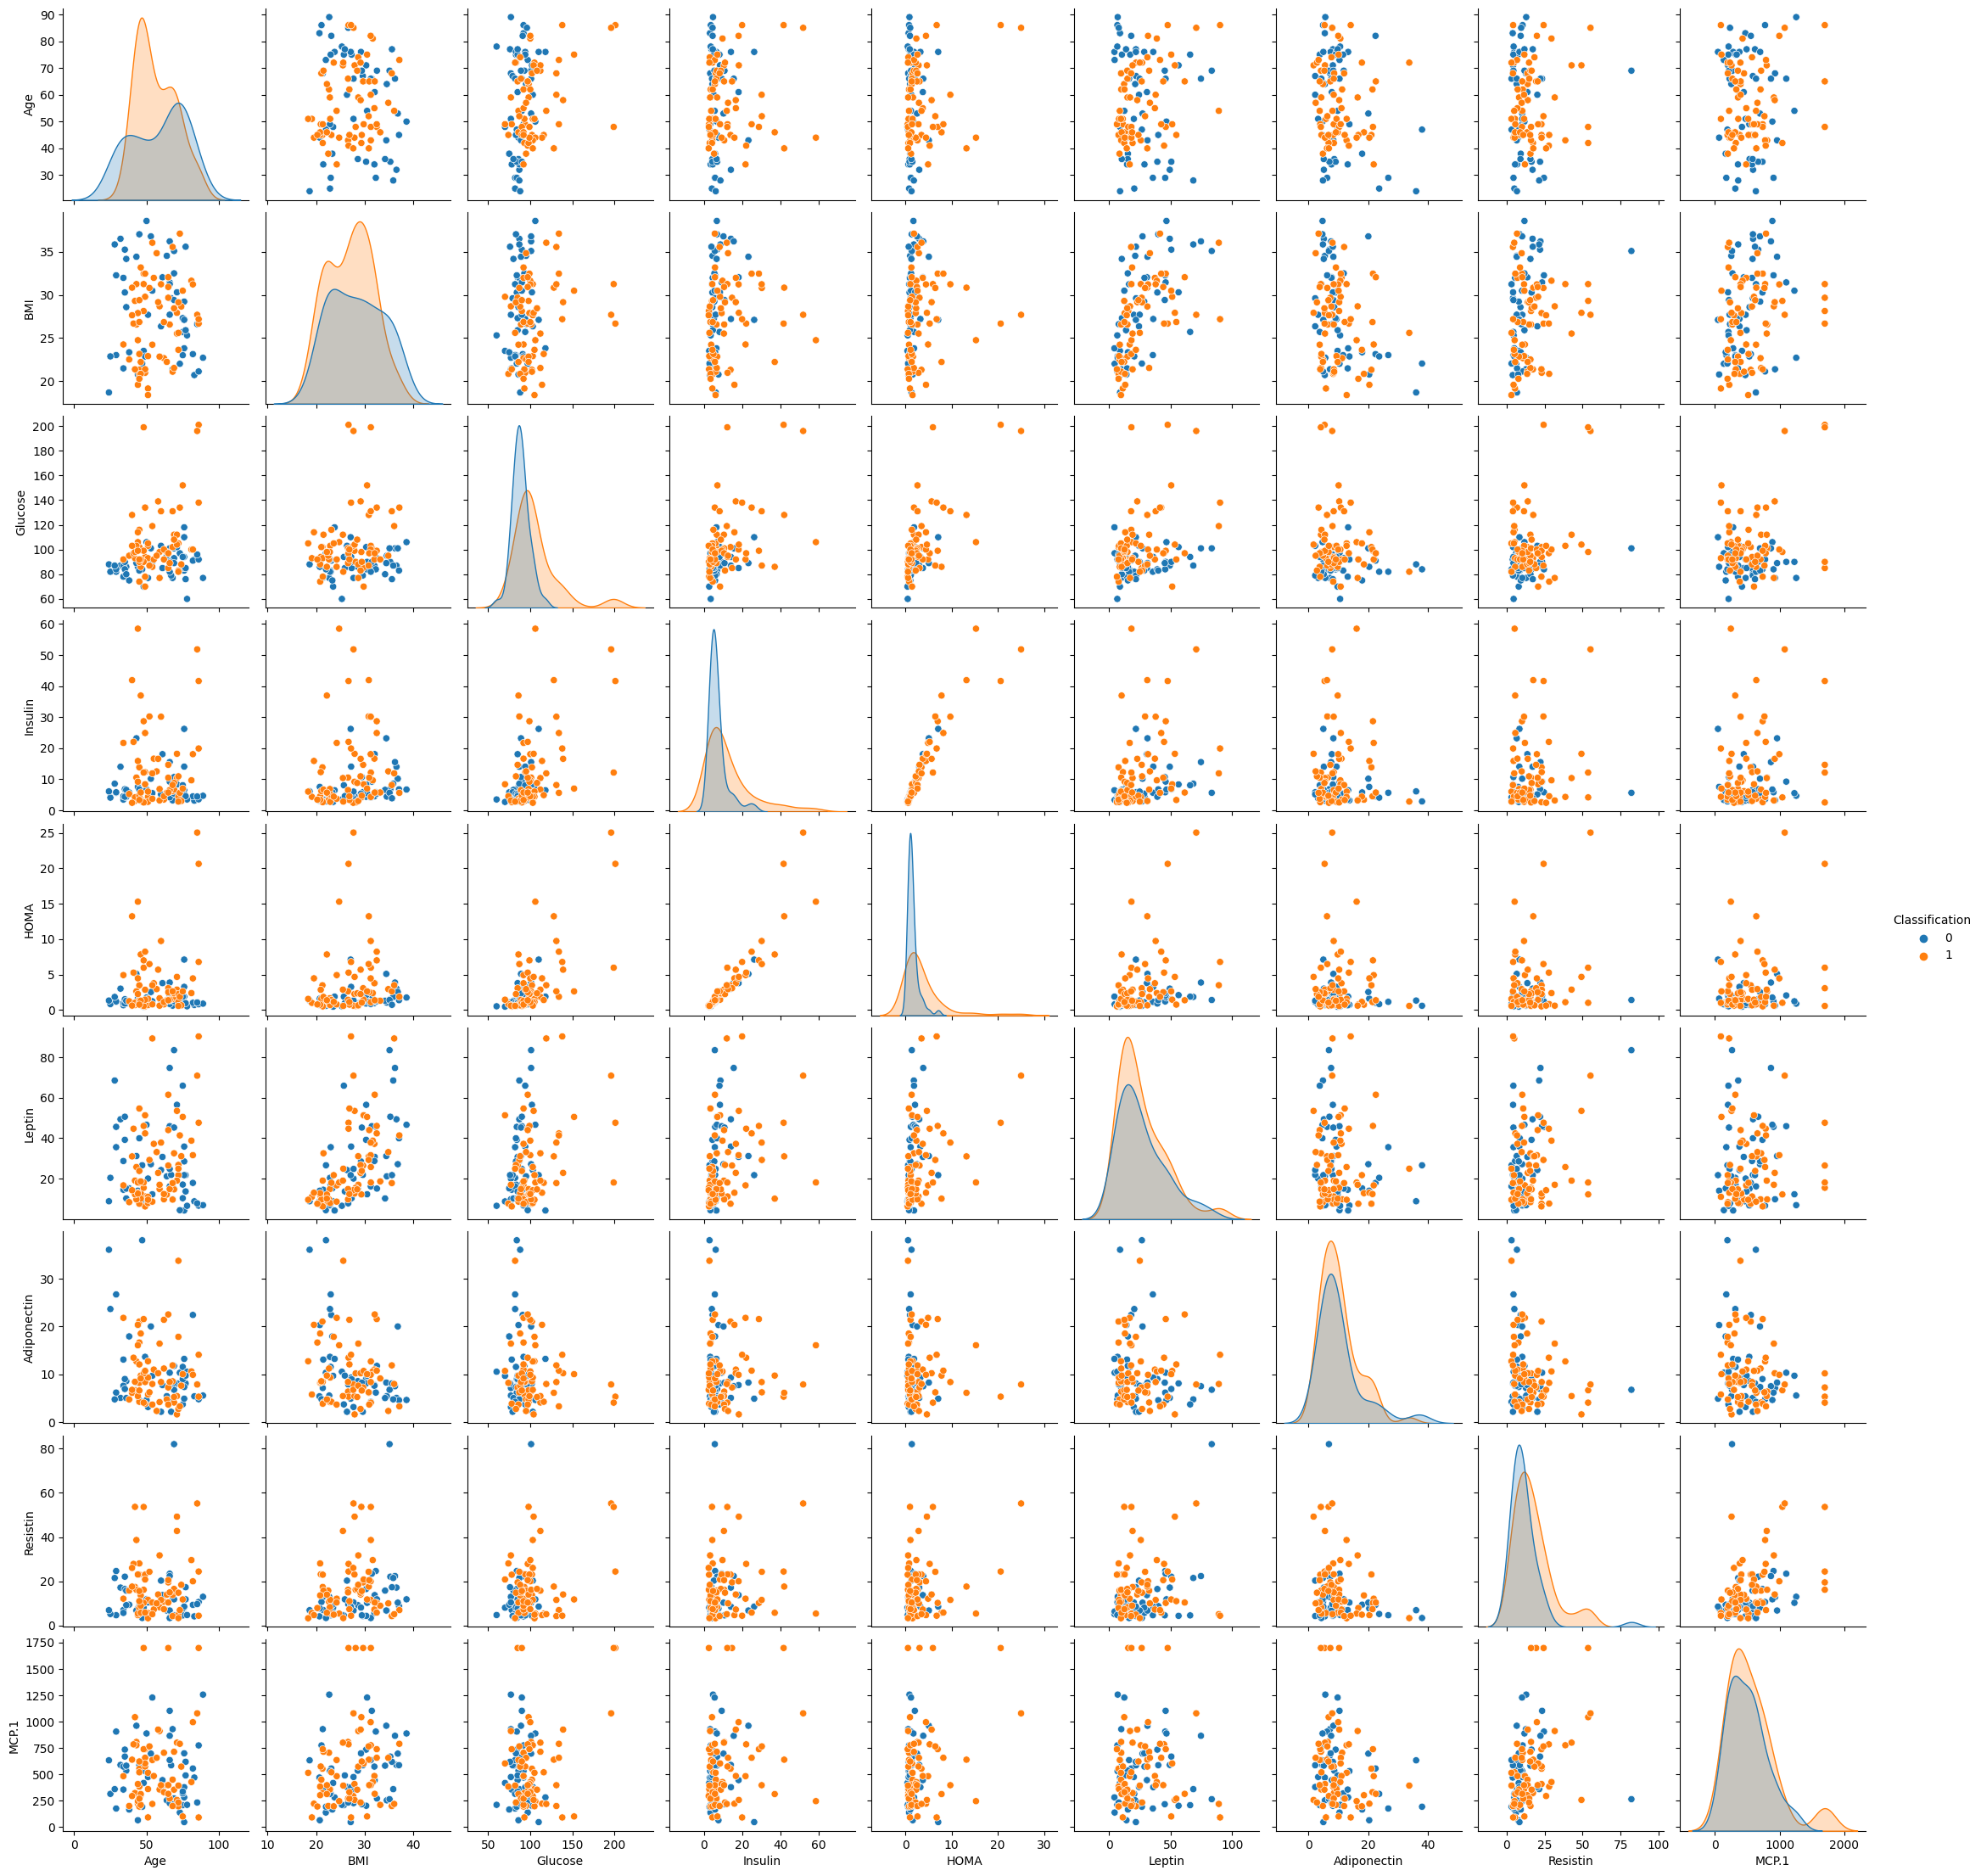

In [4]:
# plotting a pairplot in order to view possible correlations and variables distributions
fig = plt.figure(figsize=(10,10))
sns.pairplot(data=df, hue='Classification')
plt.show()

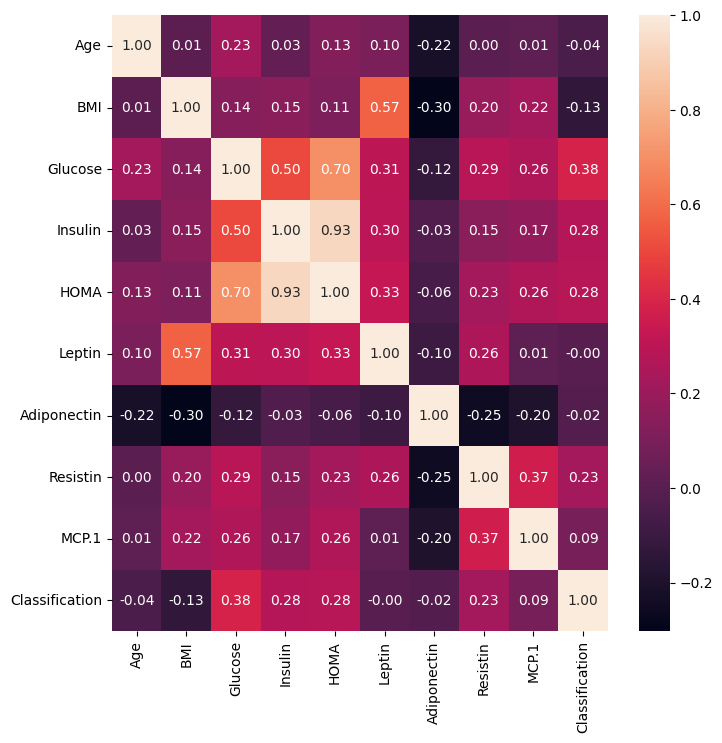

In [5]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")
plt.show()

In [6]:
# scalling the X variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_scaled = scaler.fit_transform(X)

In [7]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=639)

In [8]:
# let's see how different models would perform
from lazypredict.Supervised import LazyClassifier
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 35.25it/s]

[LightGBM] [Info] Number of positive: 49, number of negative: 43
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532609 -> initscore=0.130620
[LightGBM] [Info] Start training from score 0.130620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [9]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.79,0.81,0.81,0.79,0.02
RidgeClassifier,0.79,0.81,0.81,0.79,0.00
PassiveAggressiveClassifier,0.79,0.81,0.81,0.79,0.00
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.09
ExtraTreesClassifier,0.79,0.77,0.77,0.79,0.06
LinearDiscriminantAnalysis,0.75,0.76,0.76,0.75,0.02
SGDClassifier,0.75,0.76,0.76,0.75,0.01
KNeighborsClassifier,0.75,0.76,0.76,0.75,0.00
SVC,0.75,0.73,0.73,0.75,0.01


In [108]:
# let´s try the ridgeclassifierCV
from sklearn.linear_model import RidgeClassifierCV

# RidgeCV_1 uses the scoring accuracy

ridgeCV_1 = RidgeClassifierCV(alphas=[0.0001,0.001, 0.005, 0.01, 0.1, 1, 10], scoring='accuracy')
ridgeCV_1.fit(X_train, y_train)

RidgeClassifierCV(alphas=[0.0001, 0.001, 0.005, 0.01, 0.1, 1, 10],
                  scoring='accuracy')

In [109]:
print(f'Best alpha: {ridgeCV_1.alpha_}')
print(f'Best score: {ridgeCV_1.best_score_ }')
print(f'Coefficients: {ridgeCV_1.coef_}')

Best alpha: 0.0001
Best score: 1.0
Coefficients: [[-0.08131531 -0.27825584  0.54129644  0.97305226 -1.04191304  0.0024747
   0.05885181  0.20191118  0.10345901]]


In [110]:
y_pred = ridgeCV_1.predict(X_test)

In [111]:
ridgeCV_1.n_features_in_

9

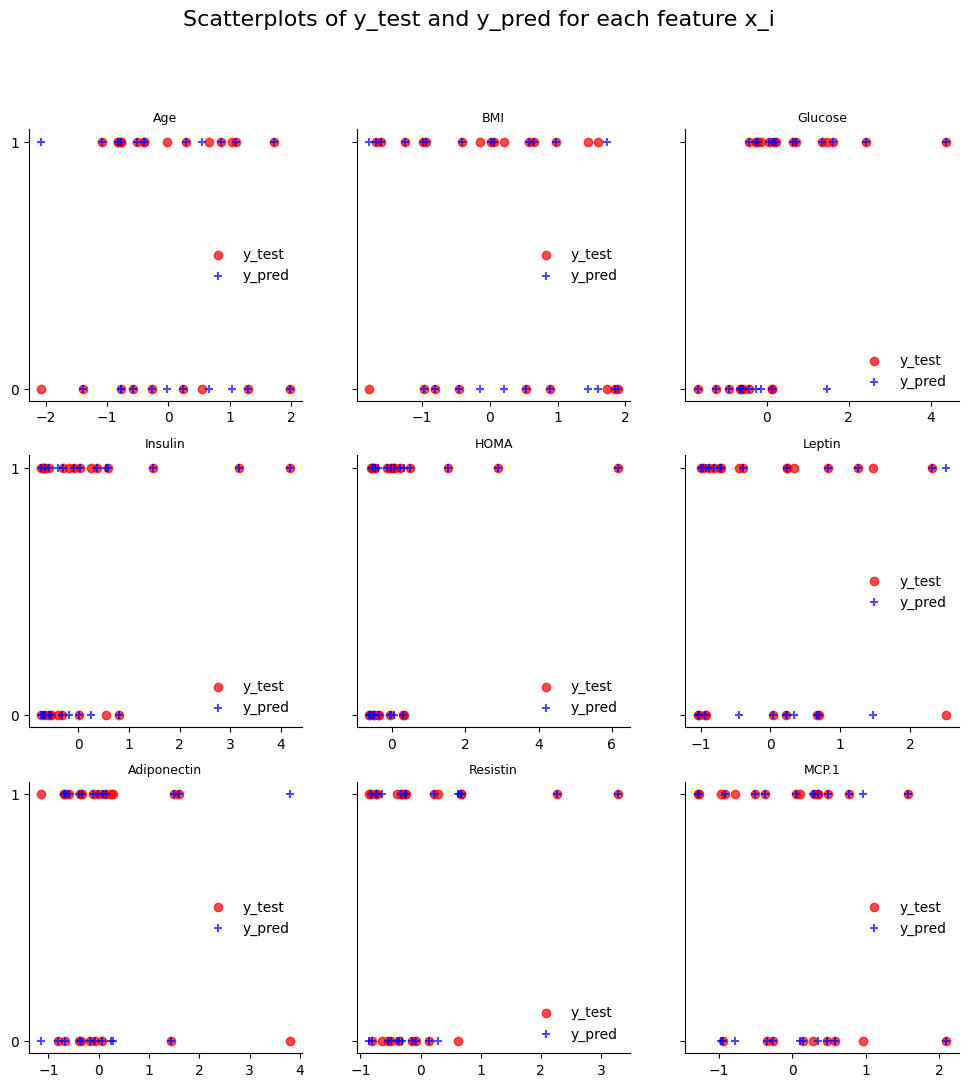

In [112]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), sharey= 'row')
features = list(X.columns)
fig.suptitle('Scatterplots of y_test and y_pred for each feature x_i', fontsize=16)
for i, ax in enumerate(axes.flatten()):
    ax.scatter(X_test[:, i], y_test, label='y_test', alpha=0.7, c='red')
    ax.scatter(X_test[:, i], y_pred, label='y_pred', alpha=0.7, c='blue', marker='+')
    ax.set_title(features[i], fontsize= 9)
    ax.set_yticks([0, 1])
    legend = ax.legend()
    legend.set_frame_on(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


In [115]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_ridge = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_ridge:.4f}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7500
F1 Score: 0.7857


In [38]:
ridgeCV_2 = RidgeClassifierCV(alphas=[0.001, 0.005, 0.01, 0.1, 1, 10], scoring='f1')
ridgeCV_2.fit(X_train, y_train)

RidgeClassifierCV(alphas=[0.001, 0.005, 0.01, 0.1, 1, 10], scoring='f1')

In [39]:
print(f'Best alpha: {ridgeCV_2.alpha_}')
print(f'Best score: {ridgeCV_2.best_score_ }')
print(f'Coefficients: {ridgeCV_2.coef_}')

Best alpha: 0.001
Best score: 0.0
Coefficients: [[-0.08132549 -0.27822445  0.54114858  0.97264591 -1.04136155  0.00246051
   0.05884615  0.20191679  0.10342942]]


In [40]:
y_pred = ridgeCV_2.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7500
F1 Score: 0.7857


In [65]:
## let´s try a decision tree

from sklearn.tree import DecisionTreeClassifier

# dt1 uses gini criterion

dt_1 = DecisionTreeClassifier(criterion= 'gini', max_depth=5, random_state=639)

dt_1.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=639)

In [66]:
dt_1.feature_importances_

array([0.02607774, 0.30564401, 0.21065685, 0.08211932, 0.        ,
       0.07080502, 0.03477032, 0.22595909, 0.04396764])

In [67]:
y_pred_tree_1 = dt_1.predict(X_test)

In [68]:
accuracy_tree_1 = accuracy_score(y_test, y_pred_tree_1)
print(f'Accuracy: {accuracy_tree_1:.4f}')

f1_tree_1 = f1_score(y_test, y_pred_tree_1)
print(f'F1 Score: {f1_tree_1:.4f}')

Accuracy: 0.6667
F1 Score: 0.7500


In [51]:
from sklearn import tree

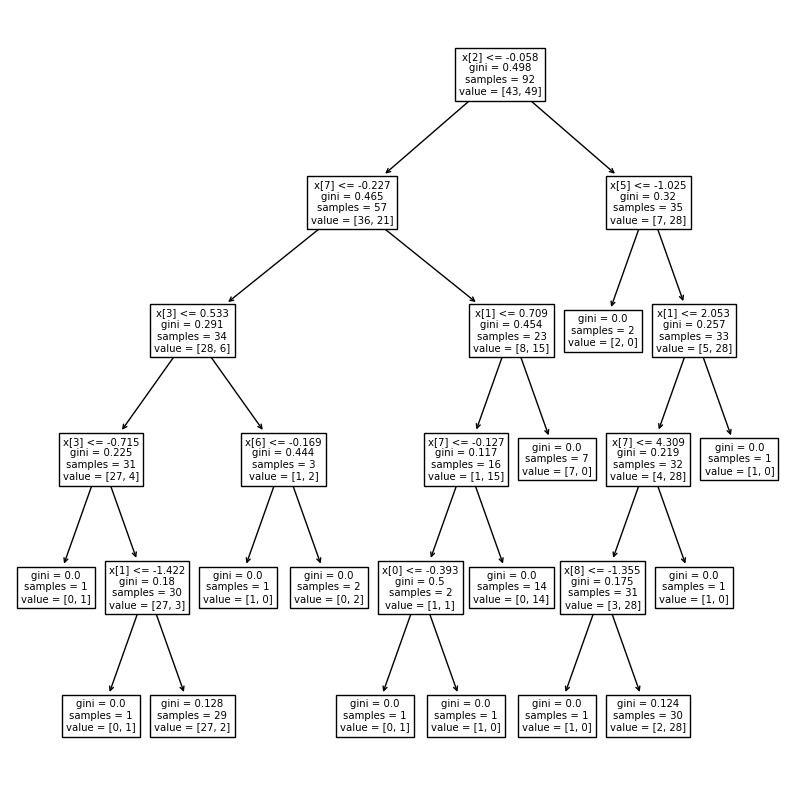

In [69]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt_1)
plt.show()


In [70]:
dt_2 = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, random_state=639)

dt_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=639)

In [71]:
y_pred_tree_2 = dt_2.predict(X_test)
accuracy_tree_2 = accuracy_score(y_test, y_pred_tree_2)
print(f'Accuracy: {accuracy_tree_2:.4f}')

f1_tree_2 = f1_score(y_test, y_pred_tree_2)
print(f'F1 Score: {f1_tree_2:.4f}')

## we can see that entropy has a worst performance

Accuracy: 0.6250
F1 Score: 0.6897


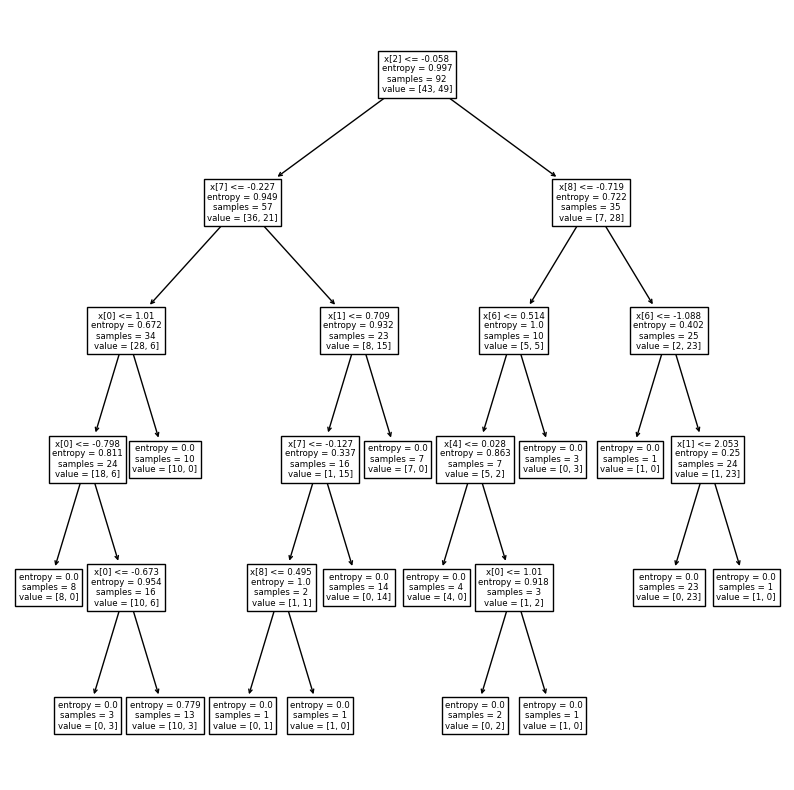

In [72]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt_2)
plt.show()

Accuracy: 0.5417
F1 Score: 0.6452


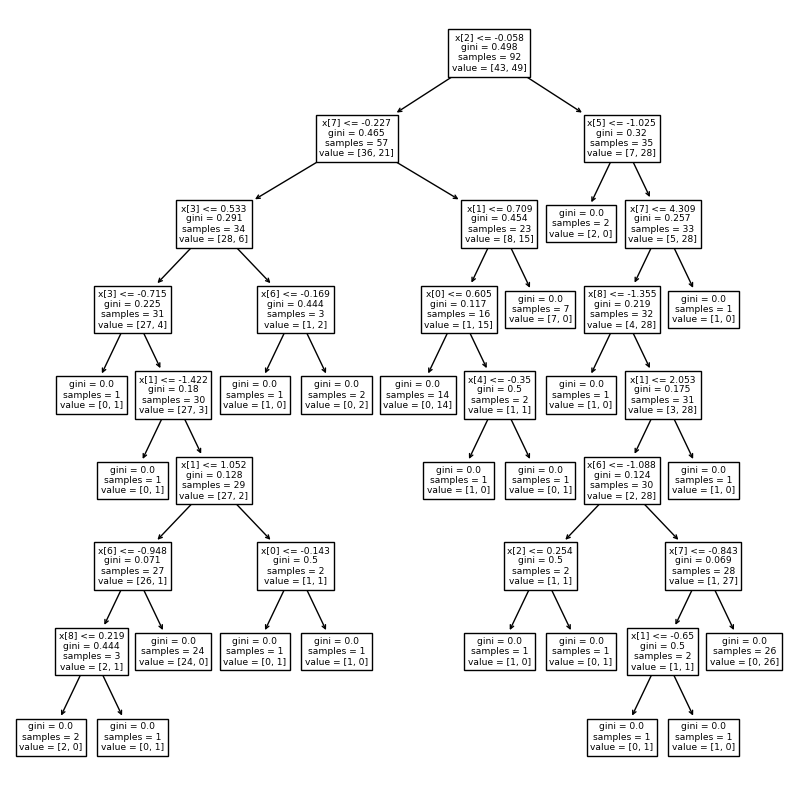

In [73]:
dt_3 = DecisionTreeClassifier(criterion= 'gini', max_depth=10, random_state=639)
dt_3.fit(X_train, y_train)
y_pred_tree_3 = dt_3.predict(X_test)
accuracy_tree_3 = accuracy_score(y_test, y_pred_tree_3)
print(f'Accuracy: {accuracy_tree_3:.4f}')

f1_tree_3 = f1_score(y_test, y_pred_tree_3)
print(f'F1 Score: {f1_tree_3:.4f}')

plt.figure(figsize=(10,10))
tree.plot_tree(dt_3)
plt.show()

We can see that the Decision Tree with depth = 10 has a worst performance on the test set, probably due to overfitting.

Accuracy: 0.6667
F1 Score: 0.7333


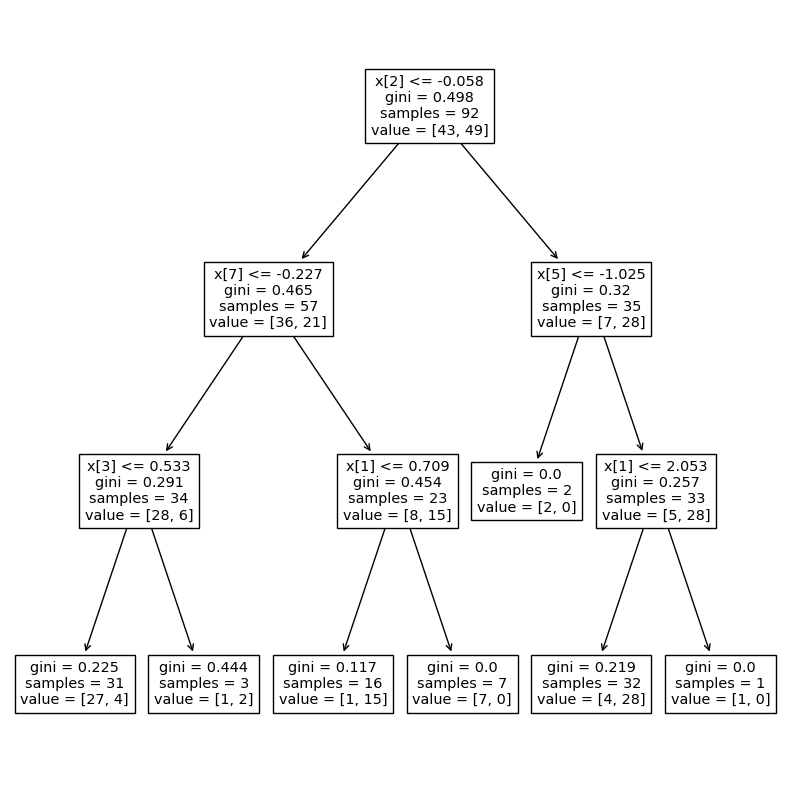

In [74]:
dt_4 = DecisionTreeClassifier(criterion= 'gini', max_depth=3, random_state=639)
dt_4.fit(X_train, y_train)
y_pred_tree_4 = dt_4.predict(X_test)
accuracy_tree_4 = accuracy_score(y_test, y_pred_tree_4)
print(f'Accuracy: {accuracy_tree_4:.4f}')

f1_tree_4 = f1_score(y_test, y_pred_tree_4)
print(f'F1 Score: {f1_tree_4:.4f}')

plt.figure(figsize=(10,10))
tree.plot_tree(dt_4)
plt.show()

Accuracy: 0.6667
F1 Score: 0.7333


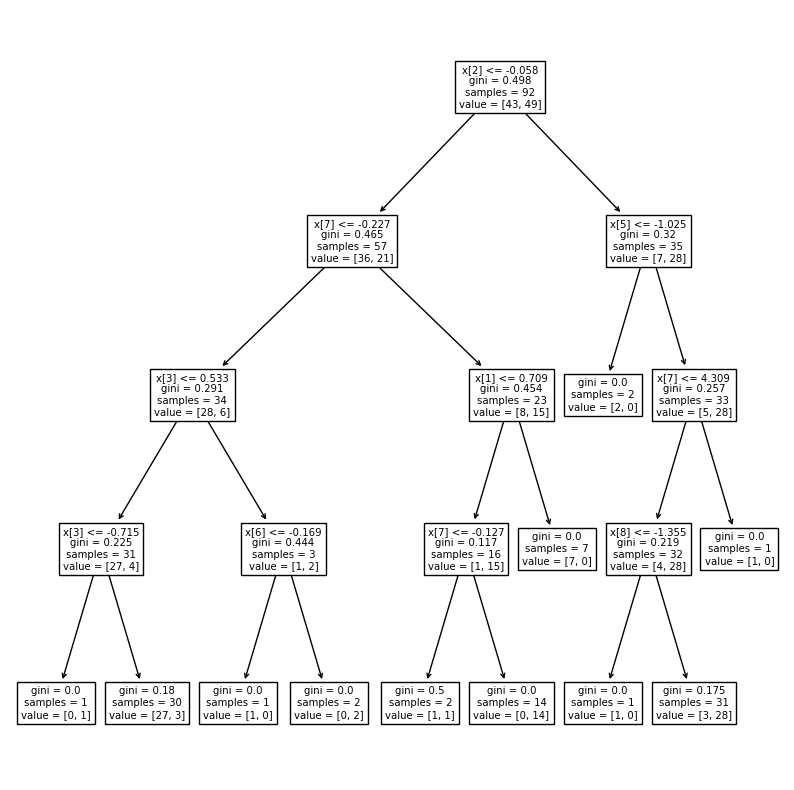

In [75]:
dt_5 = DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=639)
dt_5.fit(X_train, y_train)
y_pred_tree_5 = dt_5.predict(X_test)
accuracy_tree_5 = accuracy_score(y_test, y_pred_tree_5)
print(f'Accuracy: {accuracy_tree_5:.4f}')

f1_tree_5 = f1_score(y_test, y_pred_tree_5)
print(f'F1 Score: {f1_tree_5:.4f}')

plt.figure(figsize=(10,10))
tree.plot_tree(dt_5)
plt.show()

Accuracy: 0.5833
F1 Score: 0.6667


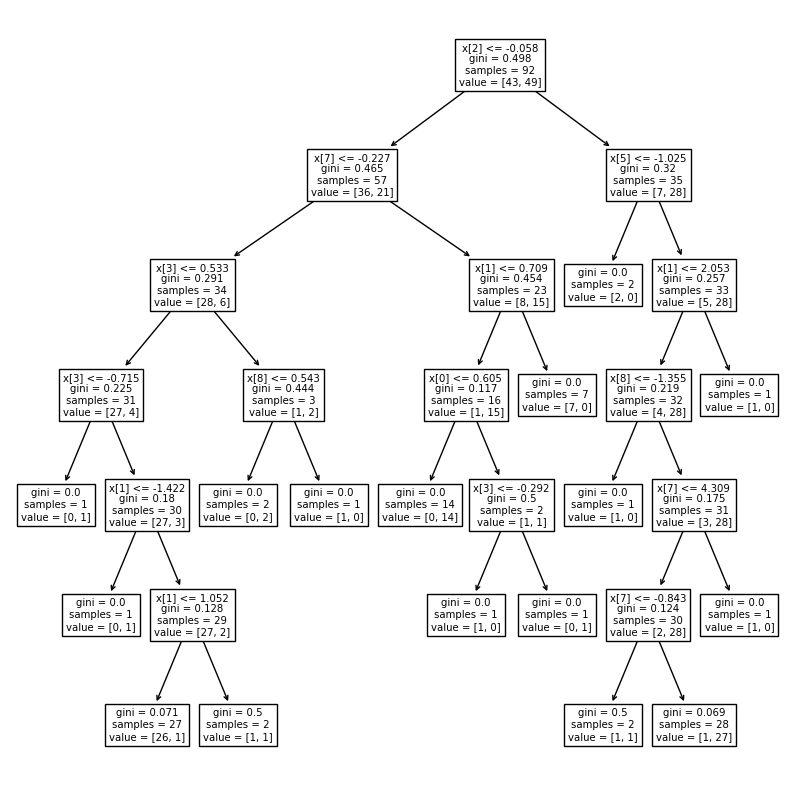

In [76]:
dt_6 = DecisionTreeClassifier(criterion= 'gini', max_depth=6, random_state=639)
dt_6.fit(X_train, y_train)
y_pred_tree_6 = dt_6.predict(X_test)
accuracy_tree_6 = accuracy_score(y_test, y_pred_tree_6)
print(f'Accuracy: {accuracy_tree_6:.4f}')

f1_tree_6 = f1_score(y_test, y_pred_tree_6)
print(f'F1 Score: {f1_tree_6:.4f}')

plt.figure(figsize=(10,10))
tree.plot_tree(dt_6)
plt.show()

Till now, we observe that the best tree has a depth = 3. (observe that depth = 5 has the same accuracy, but depth = 3 is a simpler model. Let's use GridSearchCV to confirm:

In [77]:
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeClassifier(criterion='gini', random_state=639)
param_grid = {'max_depth': [i for i in range(1,20)]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best depth: {grid_search.best_params_["max_depth"]}')
best_dt_model = grid_search.best_estimator_
best_accuracy = best_dt_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy:.4f}')


Best depth: 3
Accuracy on the test set: 0.6667


In [85]:
# let's try now a RandomForest:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [i for i in range(1,21)],
    'bootstrap': [True, False],
    'random_state': [639]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print(f'Best parameters: {grid_search_rf.best_params_}')
best_rf_model = grid_search_rf.best_estimator_
best_accuracy_rf = best_rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy_rf:.4f}')

Best parameters: {'bootstrap': True, 'max_depth': 3, 'n_estimators': 200, 'random_state': 639}
Accuracy on the test set: 0.6667


In [81]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, bootstrap=True, random_state=639)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')

Accuracy: 0.6667


So, we have the following accuracises:  
RidgeCV :       0.75    (alpha= 0.01)  
DecisionTree :  0.6667  (max_depth= 3)  
RandomForest :  0.6667  ('bootstrap': True, 'max_depth': 3, 'n_estimators': 200)

In [86]:
from sklearn.svm import SVC

svm_model= SVC()

param_grid_svm = {
                    'C': [i for i in range(1,20)],
                    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'degree': [i for i in range(1,10)]
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print(f'Best parameters: {grid_search_svm.best_params_}')
best_svm_model = grid_search_svm.best_estimator_
best_accuracy_svm = best_svm_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy_svm:.4f}')

Best parameters: {'C': 5, 'degree': 3, 'kernel': 'poly'}
Accuracy on the test set: 0.8333


In [87]:
svm = SVC(C=5, kernel= 'poly', degree= 3, random_state=639)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.4f}')

Accuracy: 0.8333


In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()

param_grid_knn = {
                    'n_neighbors': [i for i in range(1,20)],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                    'p': [1,2,3,4,5]                    
                }

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print(f'Best parameters: {grid_search_knn.best_params_}')
best_knn_model = grid_search_knn.best_estimator_
best_accuracy_knn = best_knn_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy_knn:.4f}')

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Accuracy on the test set: 0.7083


In [89]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='ball_tree', p=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.4f}')


Accuracy: 0.7083


So, we have the following best accuracies for each model:  
RidgeCV :       0.75    (alpha= 0.01)  
DecisionTree :  0.6667  (max_depth= 3)  
RandomForest :  0.6667  ('bootstrap': True, 'max_depth': 3, 'n_estimators': 200)  
SVM:            0.833   (C=5, kernel= 'poly', degree= 3)  
KNN:            0.7083  (n_neighbors=15, weights='distance', algorithm='ball_tree', p=1)


In [91]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()

param_grid_lr = {
                    'penalty': [None, 'l1', 'l2', 'elasticnet'],
                    'C': [0.1, 1, 5, 10],
                    'class_weight': [None, 'balanced'],
                    'random_state': [639],
                    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                    'l1_ratio': [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]       
                }

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print(f'Best parameters: {grid_search_lr.best_params_}')
best_lr_model = grid_search_lr.best_estimator_
best_accuracy_lr = best_lr_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy_lr:.4f}')

Best parameters: {'C': 1, 'class_weight': None, 'l1_ratio': 0, 'penalty': 'l1', 'random_state': 639, 'solver': 'saga'}
Accuracy on the test set: 0.7917


In [92]:
lr = LogisticRegression(penalty='l1', C=1, solver= 'saga', random_state=639)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr:.4f}')


Accuracy: 0.7917


In [95]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()
param_grid_mlp = {
                    'hidden_layer_sizes': [(20,20), (30,20), (40,20), (50,30), (50,30,20), (100,)],
                    'activation': ['logistic', 'tanh', 'relu'],
                    'solver': ['lbfgs', 'sgd', 'adam'],
                    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 10],
                    'learning_rate': ['constant', 'invscaling', 'adaptive']
                }

grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)
print(f'Best parameters: {grid_search_mlp.best_params_}')
best_mlp_model = grid_search_mlp.best_estimator_
best_accuracy_mlp = best_mlp_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy_mlp:.4f}')


Best parameters: {'activation': 'tanh', 'alpha': 0.02, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'solver': 'adam'}
Accuracy on the test set: 0.7500


In [117]:
mlp = MLPClassifier(activation= 'tanh', alpha= 0.02, hidden_layer_sizes= (100,), solver= 'adam', random_state=639)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp:.4f}')

MLP Accuracy: 0.7917


So, we have the following best accuracies for each model:  
RidgeCV :       0.75    (alpha= 0.01)  
DecisionTree :  0.6667  (max_depth= 3)  
RandomForest :  0.6667  ('bootstrap': True, 'max_depth': 3, 'n_estimators': 200)  
SVM:            0.833   (C=5, kernel= 'poly', degree= 3)  
KNN:            0.7083  (n_neighbors=15, weights='distance', algorithm='ball_tree', p=1)  
LogRegression:  0.7917  (penalty='l1', C=1, solver= 'saga')  
ML Perceptron:  0.7917  (activation= 'tanh', alpha= 0.02, hidden_layer_sizes= (100,), solver= 'adam')

In [118]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGB Accuracy: {accuracy_xgb:.4f}')

XGB Accuracy: 0.5833


So, we have the following best accuracies for each model:  
RidgeCV :       0.75    (alpha= 0.01)  
DecisionTree :  0.6667  (max_depth= 3)  
RandomForest :  0.6667  ('bootstrap': True, 'max_depth': 3, 'n_estimators': 200)  
SVM:            0.833   (C=5, kernel= 'poly', degree= 3)  
KNN:            0.7083  (n_neighbors=15, weights='distance', algorithm='ball_tree', p=1)  
LogRegression:  0.7917  (penalty='l1', C=1, solver= 'saga')  
ML Perceptron:  0.7917  (activation= 'tanh', alpha= 0.02, hidden_layer_sizes= (100,), solver= 'adam')
XGBoost:        0.5833  ()  

All this accuracies were calculated with the complete set of variables.  
Let's do a PCA in order to obtain new accuracies.

In [99]:
from sklearn.decomposition import PCA


In [107]:
n_comp = []
acc = []
for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    xgb = XGBClassifier()
    xgb.fit(X_train_pca, y_train)
    y_pred_xgb = xgb.predict(X_test_pca)
    accuracy_xgb_temp = accuracy_score(y_test, y_pred_xgb)
    n_comp.append(i)
    acc.append(accuracy_xgb_temp)
    print(f'XGB Accuracy: {accuracy_xgb_temp:.4f}, Number of components: {i}')


XGB Accuracy: 0.5000, Number of components: 1
XGB Accuracy: 0.5000, Number of components: 2
XGB Accuracy: 0.5000, Number of components: 3
XGB Accuracy: 0.7083, Number of components: 4
XGB Accuracy: 0.5833, Number of components: 5
XGB Accuracy: 0.6667, Number of components: 6
XGB Accuracy: 0.7083, Number of components: 7
XGB Accuracy: 0.6667, Number of components: 8
XGB Accuracy: 0.7083, Number of components: 9


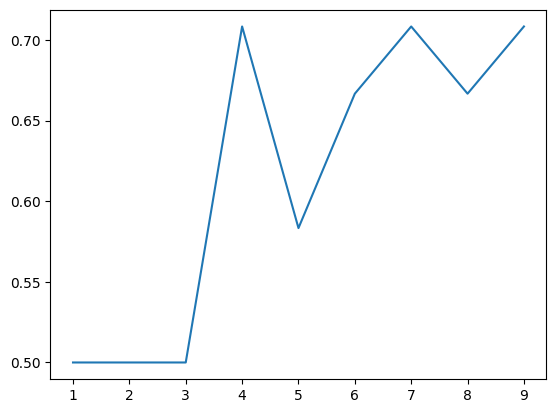

In [105]:
plt.plot(n_comp, acc)

In [116]:
accuracy_dt = accuracy_tree_4

In [124]:
# let´s apply now a PCA(n=4) for all the previous models
acc_dict = {}
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ridgeCV_pca = RidgeClassifierCV(alphas=[0.0001, 0.001, 0.01, 0.1], scoring='accuracy')
ridgeCV_pca.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridgeCV_pca.predict(X_test_pca)
accuracy_ridge_pca = accuracy_score(y_test, y_pred_ridge_pca)
acc_dict['RidgeCV'] = [accuracy_ridge, accuracy_ridge_pca]

dt_pca = DecisionTreeClassifier(criterion= 'gini', max_depth=3, random_state=639)
dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_pca.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
acc_dict['DecTree'] = [accuracy_dt, accuracy_dt_pca]

rf_pca = RandomForestClassifier(n_estimators=200, max_depth=3, bootstrap=True, random_state=639)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
acc_dict['RandomForest'] = [accuracy_rf, accuracy_rf_pca]

svm_pca = SVC(C=5, kernel= 'poly', degree= 3, random_state=639)
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
acc_dict['SVM'] = [accuracy_svm, accuracy_svm_pca]

knn_pca = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='ball_tree', p=1)
knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
acc_dict['KNN'] = [accuracy_knn, accuracy_knn_pca]

lr_pca = LogisticRegression(penalty='l1', C=1, solver= 'saga', random_state=639)
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
acc_dict['LogReg'] = [accuracy_lr, accuracy_lr_pca]

mlp_pca = MLPClassifier(activation= 'tanh', alpha= 0.02, hidden_layer_sizes= (100,), solver= 'adam', random_state=639)
mlp_pca.fit(X_train_pca, y_train)
y_pred_mlp_pca = mlp_pca.predict(X_test_pca)
accuracy_mlp_pca = accuracy_score(y_test, y_pred_mlp_pca)
acc_dict['MLPerceptron'] = [accuracy_mlp, accuracy_mlp_pca]

xgb_pca = XGBClassifier(random_state=639)
xgb_pca.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)
accuracy_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)
acc_dict['XGBoost'] = [accuracy_xgb, accuracy_xgb_pca]


In [125]:
acc_dict

{'RidgeCV': [0.75, 0.5833333333333334],
 'DecTree': [0.6666666666666666, 0.75],
 'RandomForest': [0.6666666666666666, 0.7083333333333334],
 'SVM': [0.8333333333333334, 0.7916666666666666],
 'KNN': [0.7083333333333334, 0.75],
 'LogReg': [0.7916666666666666, 0.625],
 'MLPerceptron': [0.7916666666666666, 0.6666666666666666],
 'XGBoost': [0.5833333333333334, 0.7083333333333334]}

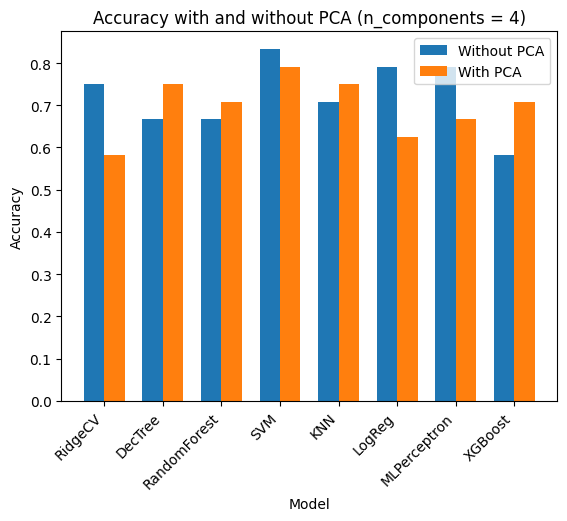

In [127]:
model_names = list(acc_dict.keys())
accuracies_no_pca = [acc[0] for acc in acc_dict.values()]
accuracies_with_pca = [acc[1] for acc in acc_dict.values()]

bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, accuracies_no_pca, bar_width, label='Without PCA')

plt.bar(index + bar_width, accuracies_with_pca, bar_width, label='With PCA')

# Configurar el gráfico
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy with and without PCA (n_components = 4)')
plt.xticks(index + bar_width / 2, model_names)
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()